In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.measurement

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
last_date = engine.execute('SELECT max(date) FROM Measurement').fetchall()
print(last_date)

[('2017-08-23',)]


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [39]:
# Perform a query to retrieve the data and precipitation scores
rain_dates = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain_dates, columns = ["Date", "Precipiation"])
rain_df.set_index("Date", inplace=True)

# Sort the dataframe by date
rain_df = rain_df.sort_values(["Date"])



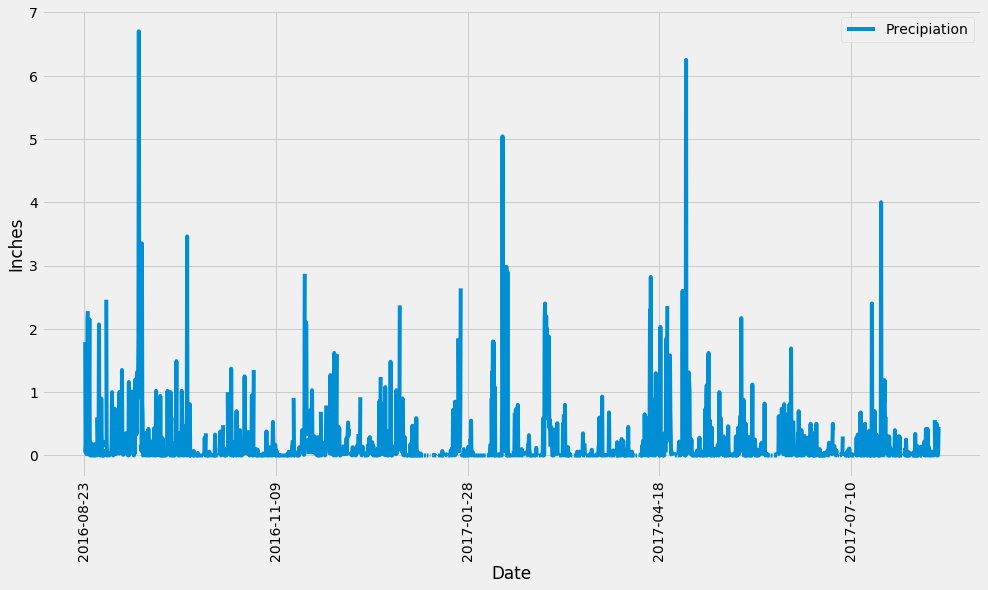

In [53]:
# Use Pandas Plotting with Matplotlib to plot the data
rain_plot = rain_df.plot(rot=90, figsize=(15,8))

plt.ylabel("Inches")
plt.show()

In [54]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,Precipiation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [59]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station).group_by(station.station).count()
print(f"There are {station_count} stations in the dataset.")

There are 9 stations in the dataset.


In [71]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# Assign variables 
station = measurement.station
count = func.count(measurement.station)

# Query most active stations
most_active = session.query(station, count).group_by(station).order_by(count.desc()).all()

most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [81]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = "USC00519281"

session.query(measurement.station,
              func.min(measurement.tobs),
              func.max(measurement.tobs,
              func.avg(measurement.tobs))).filter(measurement.station == most_active_station).all()




[('USC00519281', 54.0, 71.66378066378067)]

In [113]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(measurement.tobs).filter(measurement.date >= year_ago).\
            filter(measurement.station == most_active_station).all()

temp_df = pd.DataFrame(temp_data)
temp_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


<function matplotlib.pyplot.show(*args, **kw)>

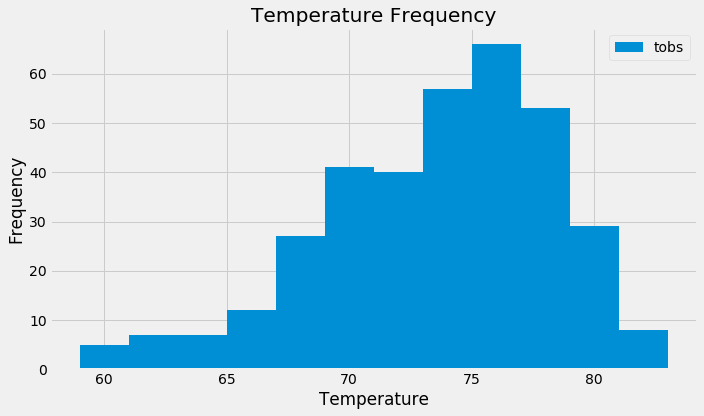

In [120]:
plt.figure(figsize=(10,6))
plt.hist(temp_df["tobs"], bins=12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("Temperature Frequency")
plt.legend(["tobs"])
plt.tight_layout()

plt.show

# Close session

In [121]:
# Close Session
session.close()